In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

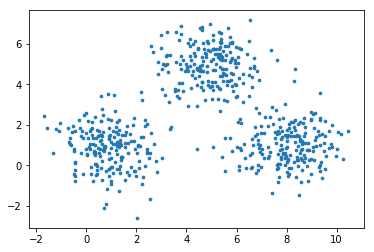

In [74]:
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [76]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

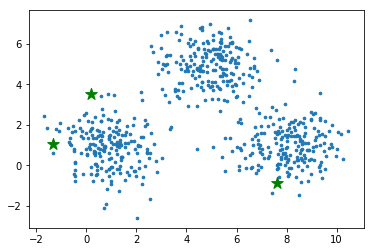

In [78]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [79]:
centers_old = np.zeros(centers.shape)

In [103]:
centers_new = deepcopy(centers)

In [104]:
clusters = np.zeros(data.shape[0])

In [105]:
distances = np.zeros((data.shape[0], k))

In [106]:
error = np.linalg.norm(centers_new - centers_old)

In [113]:
while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers_new[i], axis = 1)
    clusters = np.argmin(distances, axis=1)
    centers_old = deepcopy(centers_new)
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis = 0)
    error = np.linalg.norm(centers_new - centers_old)

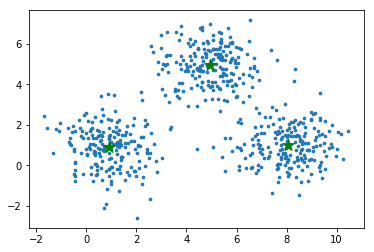

In [117]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)